<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



# MNIST Handwritten Digit Classification 


| <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCrVKSbyfaWfhQcMq39zdOv0lMs_PD1oMpVg&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRV0N_-o_MK6BOzArAU7M8-LldqxDvW6rQyuKojYQEF7Z8AqwCTOlCuG7-T7kVXolkB3Aw&usqp=CAU" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTA_3-AxoqTEkaXq-BTr1fDtykr-b3LJI9w9g&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrLMEKtW5rKzATk-pfpvFixgFpU7xKuv5MiYLIv3HhDtYtBm27hsjHN1Kxnmcd_FjEQSs&usqp=CAU" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> |
|---|---|---|---|


In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(2)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the mnist data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of numpy array
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Training Data = 60,000 Images\
Test Data = 10,000 Images

Image Dimension = 28 x 28

GrayScale Image = 1 Tone

In [5]:
# prinitng the 20th image
print(X_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

In [6]:
print(X_train[20].shape)

(28, 28)


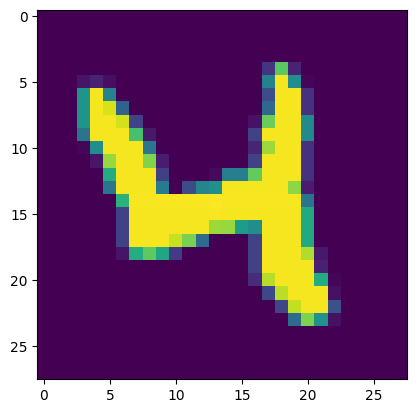

In [7]:
# displaying the image
plt.imshow(X_train[20])
plt.show()

In [8]:
# Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [9]:
# Building a neural network
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

In [10]:
# compiling the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
# training the neural network we have
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, Y_train, validation_split=0.1, epochs=50, callbacks=[early_stop])


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9052 - loss: 0.3269 - val_accuracy: 0.9583 - val_loss: 0.1459
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9537 - loss: 0.1530 - val_accuracy: 0.9647 - val_loss: 0.1168
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9662 - loss: 0.1115 - val_accuracy: 0.9678 - val_loss: 0.1090
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0881 - val_accuracy: 0.9682 - val_loss: 0.1095
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0718 - val_accuracy: 0.9693 - val_loss: 0.1075
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0596 - val_accuracy: 0.9680 - val_loss: 0.1136
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0500 - val_accuracy: 0.9663 - val_loss: 0.1227
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0423 - 

Training Data Accuracy is 98.9%

**Accuracy on Test data:**\
Test Data Accuracy = 96.8%

In [12]:
loss, accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9687 - loss: 0.1120
0.9686999917030334


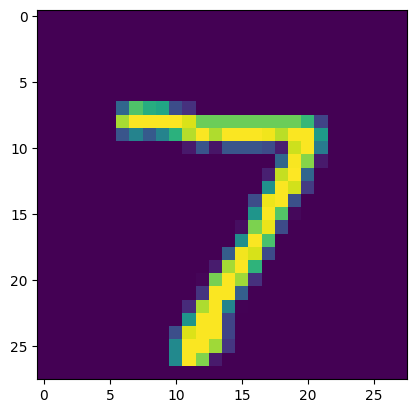

In [13]:
# first datapoint in x_test
plt.imshow(X_test[0])


In [14]:
print(Y_test[0])

7


In [15]:
Y_pred=model.predict(X_test)
print(Y_pred.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
(10000, 10)


In [16]:
#converting the prediction probabilities to class labels
y_pred=np.argmax(Y_pred,axis=1)
print(y_pred)

[7 2 1 ... 4 5 6]


**Confusion Matrix**

In [17]:
conf_mat=confusion_matrix(Y_test,y_pred)
print(conf_mat)

tf.Tensor(
[[ 967    1    1    2    2    1    3    1    2    0]
 [   0 1126    3    0    0    1    1    0    4    0]
 [   2    2  988   17    2    0    2    5   13    1]
 [   0    1    0  994    0    5    0    4    5    1]
 [   1    2    5    1  945    0    4    4    1   19]
 [   4    0    0   25    2  845    4    0   10    2]
 [   3    5    1    1    4    5  930    0    9    0]
 [   1    6    8   13    2    0    0  980    4   14]
 [   1    1    4   14    3    2    2    1  943    3]
 [   3    6    0   12    7    3    0    3    5  970]], shape=(10, 10), dtype=int32)


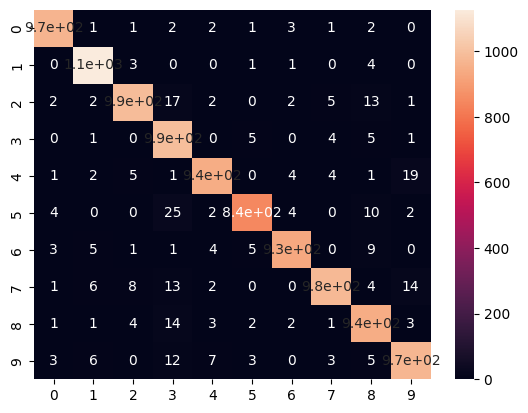

In [18]:
# Making heatmap
sns.heatmap(conf_mat,annot=True)
plt.show()

In [26]:
input_image_path = '9.png'

input_image = cv2.imread(input_image_path)

# cv2.imshow("Input Image", input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The Handwritten Digit is recognised as  9
